https://www.someweekendreading.blog/beta-ratios/

In [1]:
using Distributions
using ForwardDiff
using HypergeometricFunctions
using QuadGK
using SpecialFunctions
using StatsFuns
using StatsPlots
default(fmt=:png)

function pdf_betaratio(κ, λ, μ, ν, x)
    if x < 0
        -Inf
    elseif x ≤ 1
        exp(logbeta(κ+μ, ν) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(κ-1, x)) * 
        _₂F₁(κ+μ, 1-λ, κ+μ+ν, x)
    elseif x < Inf
        exp(logbeta(κ+μ, λ) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(-μ-1, x)) *
        _₂F₁(κ+μ, 1-ν, κ+μ+λ, 1/x)
    else
        -Inf
    end  
end

function cdf_betaratio(κ, λ, μ, ν, x)
    if x < 0
        0.0
    elseif x ≤ 1
        exp(logbeta(κ+μ, ν) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(κ, x) - log(κ)) * 
        _₃F₂(κ, κ+μ, 1-λ, κ+1, κ+μ+ν, x)
    elseif x < Inf
        1 - exp(logbeta(κ+μ, λ) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(-μ, x) - log(μ)) * 
        _₃F₂(μ, κ+μ, 1-ν, μ+1, κ+μ+λ, 1/x)
    else
        1.0
    end  
end

cdf_betaratio (generic function with 1 method)

(quadgk(f, 0, Inf))[1] = 0.9999999999995405


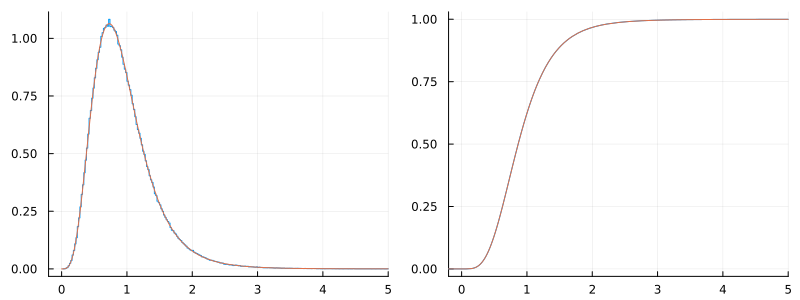

In [2]:
κ, λ, μ, ν = 5, 10, 8, 13
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

(quadgk(f, 0, Inf))[1] = 1.0000000147531618


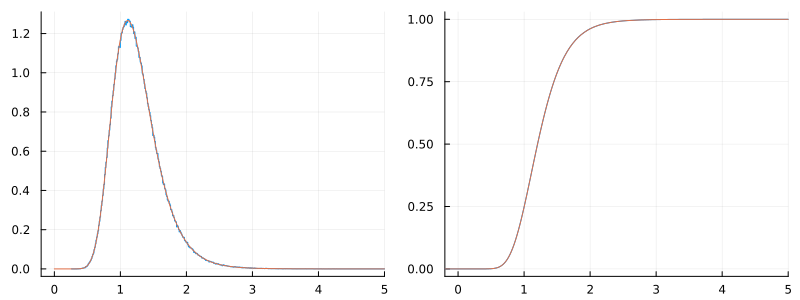

In [3]:
κ, λ, μ, ν = 20, 30, 15, 30
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

(quadgk(f, 0, Inf))[1] = 0.9999994610438168


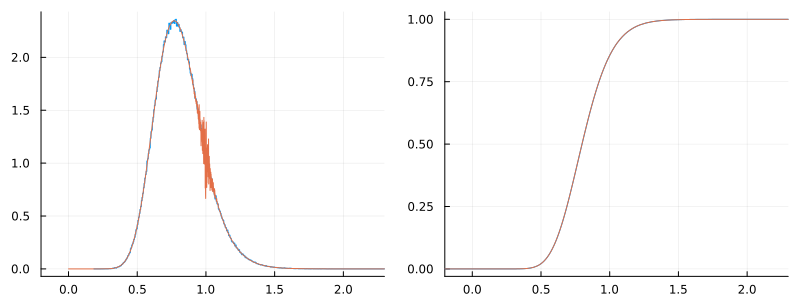

In [4]:
κ, λ, μ, ν = 20, 30, 30, 30
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

(quadgk(f, 0, Inf))[1] = 1.5773015617395694


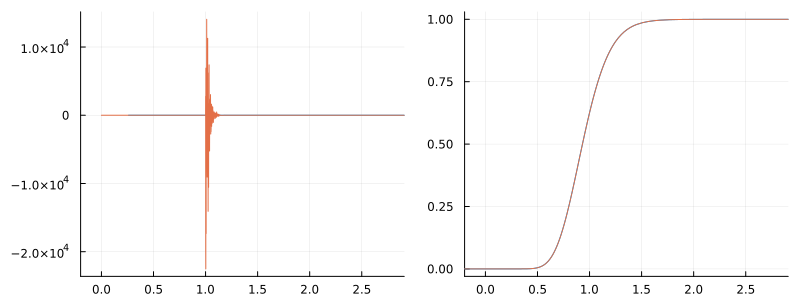

In [5]:
κ, λ, μ, ν = 20, 30, 30, 40
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

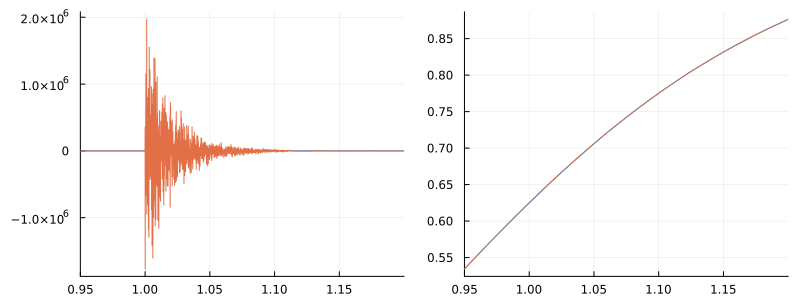

In [6]:
κ, λ, μ, ν = 20, 30, 30, 40
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
#@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
a, b = 0.95, 1.2
P1 = stephist(R; norm=true, label="")
plot!(x -> ForwardDiff.derivative(f, x), a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

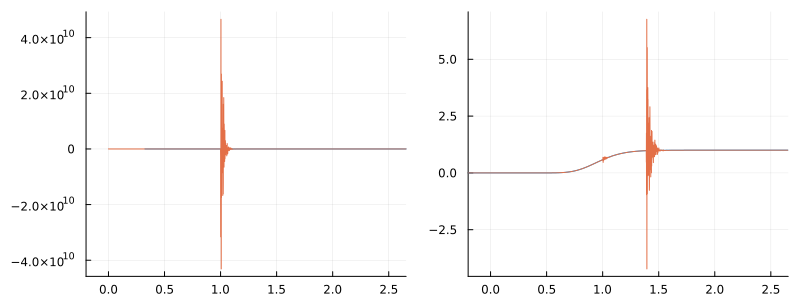

In [7]:
κ, λ, μ, ν = 30, 40, 40, 50
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
#@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
#a, b = 0.95, 1.2
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))

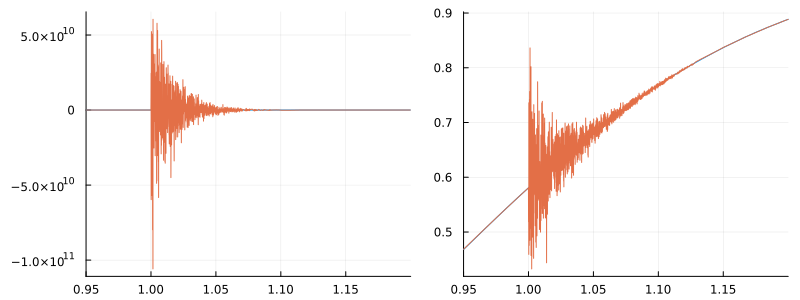

In [8]:
κ, λ, μ, ν = 30, 40, 40, 50
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
F = x -> cdf_betaratio(κ, λ, μ, ν, x)
#@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
a, b = 0.95, 1.2
P1 = stephist(R; norm=true, label="")
plot!(f, a, b; label="")
plot!(xlim=(a, b))
P2 = plot(x -> count(≤(x), R)/length(R), a, b; label="")
plot!(F, a, b; label="")
plot!(xlim=(a, b))
plot(P1, P2; size=(800, 300))